## Skin Conditions - Computer Vision

Skin diseases are common health problems affecting millions of people worldwide. Skin conditions such as acne, eczema, psoriasis, and rosacea can affect individuals' physical health as well as their psychological state. Therefore, early diagnosis and correct classification of skin diseases are of great importance in the field of dermatology. Recognizing skin diseases with traditional methods often requires expertise and can be time-consuming. However, in recent years, the development of machine learning and deep learning techniques has opened a new era in automatic recognition and classification of skin diseases.

Convolutional Neural Networks (CNN) stand out as one of the most effective methods for processing image data. CNNs achieve high success rates in the recognition of skin diseases by automatically learning the salient features in images. This study aims to develop a CNN model for classifying skin diseases.

<img src='derma.jpg' width=395 >

<a href='https://www.kaggle.com/datasets/syedalinaqvi/augmented-skin-conditions-image-dataset' target=_blank>You can find the data file here</a>

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from IPython.display import Image
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import save_model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import warnings
warnings.filterwarnings('ignore')

### Reading the pictures and labels

In [2]:
labels=['Acne','Carcinoma','Eczema','Keratosis','Milia','Rosacea']
img_path='Skin_Conditions/'

In [3]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [4]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [5]:
df.head()

,img,label
0,Skin_Conditions/Acne/Acne_1.jpg,Acne
1,Skin_Conditions/Acne/Acne_10.jpg,Acne
2,Skin_Conditions/Acne/Acne_100.jpg,Acne
3,Skin_Conditions/Acne/Acne_101.jpg,Acne
4,Skin_Conditions/Acne/Acne_102.jpg,Acne


### Label Encoding

In [6]:
d={'Acne':0, 'Carcinoma':1, 'Eczema':2, 'Keratosis':3, 'Milia':4, 'Rosacea':5}

In [7]:
df['encode_label']=df['label'].map(d)

In [8]:
df.head()

,img,label,encode_label
0,Skin_Conditions/Acne/Acne_1.jpg,Acne,0
1,Skin_Conditions/Acne/Acne_10.jpg,Acne,0
2,Skin_Conditions/Acne/Acne_100.jpg,Acne,0
3,Skin_Conditions/Acne/Acne_101.jpg,Acne,0
4,Skin_Conditions/Acne/Acne_102.jpg,Acne,0


In [44]:
df.sample(5)

,img,label,encode_label
50,Skin_Conditions/Acne/Acne_144.jpg,Acne,0
167,Skin_Conditions/Acne/Acne_25.jpg,Acne,0
2123,Skin_Conditions/Rosacea/Rosacea_214.jpg,Rosacea,5
364,Skin_Conditions/Acne/Acne_68.jpg,Acne,0
1896,Skin_Conditions/Milia/Milia_37.jpg,Milia,4


In [9]:
x=[]
for img in df['img']:  
    img=cv2.imread(img) 
    img=cv2.resize(img,(32,32))  
    img=img/255.0  
    x.append(img)

### Modelling

In [10]:
x=np.array(x)

In [11]:
y=df['encode_label']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [30]:
model=Sequential()
model.add(Input(shape=(32,32,3))) 
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(6,activation='sigmoid'))   
early_stopping=EarlyStopping(patience=10,verbose=2,monitor='val_accuracy')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,verbose=1,callbacks=[early_stopping])

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2699 - loss: 1.7324 - val_accuracy: 0.4614 - val_loss: 1.4070
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5100 - loss: 1.2700 - val_accuracy: 0.5658 - val_loss: 1.1930
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5865 - loss: 1.0714 - val_accuracy: 0.6117 - val_loss: 1.0612
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6428 - loss: 0.9948 - val_accuracy: 0.5741 - val_loss: 1.0824
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6324 - loss: 0.9467 - val_accuracy: 0.5929 - val_loss: 1.0674
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6686 - loss: 0.8743 - val_accuracy: 0.6409 - val_loss: 0.9769
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7190 - loss: 0.7672 - val_accuracy: 0.6660 - val_loss: 0.9178
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7078 - loss: 0.7737 - val_accuracy: 0.6033 - v

In [32]:
loss,accuracy=model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6633 - loss: 1.8003
Test Loss: 1.5507644414901733
Test Accuracy: 0.6972860097885132


In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 945,620 (3.61 MB)

 Trainable params: 315,206 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 630,414 (2.40 MB)

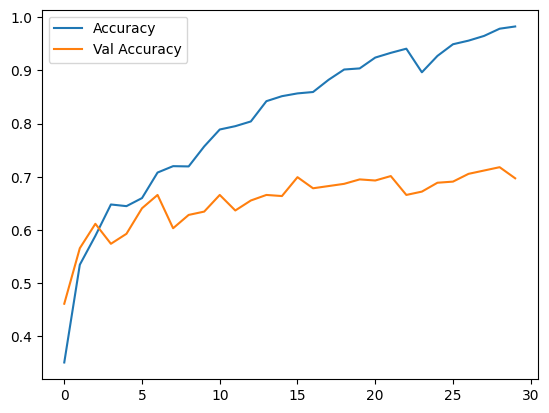

In [34]:
plt.plot(history.history['accuracy'],label='Accuracy') 
plt.plot(history.history['val_accuracy'],label='Val Accuracy') 
plt.legend()

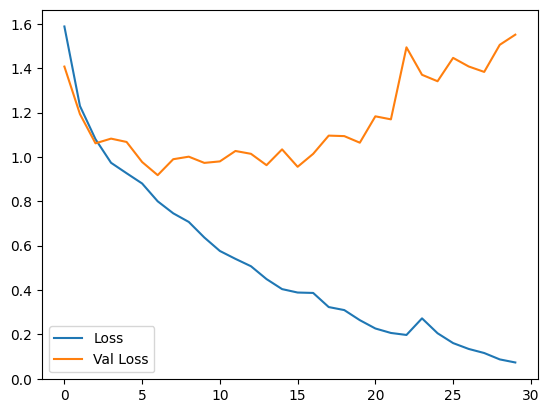

In [35]:
plt.plot(history.history['loss'],label='Loss') 
plt.plot(history.history['val_loss'],label='Val Loss') 
plt.legend()

In [36]:
pred=model.predict(x_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [37]:
confusion_matrix(y_test,np.argmax(pred,axis=1))

array([[65,  1,  8,  1,  2,  5],
       [ 0, 77,  2,  2,  2,  0],
       [25,  2, 43,  3,  3,  5],
       [ 4,  1,  6, 67,  3,  2],
       [12,  5, 13,  2, 45,  5],
       [16,  1,  8,  0,  7, 36]], dtype=int64)

In [38]:
print(classification_report(y_test, np.argmax(pred,axis=1)))

              precision    recall  f1-score   support

           0       0.53      0.79      0.64        82
           1       0.89      0.93      0.91        83
           2       0.54      0.53      0.53        81
           3       0.89      0.81      0.85        83
           4       0.73      0.55      0.62        82
           5       0.68      0.53      0.60        68

    accuracy                           0.70       479
   macro avg       0.71      0.69      0.69       479
weighted avg       0.71      0.70      0.69       479



<Axes: >

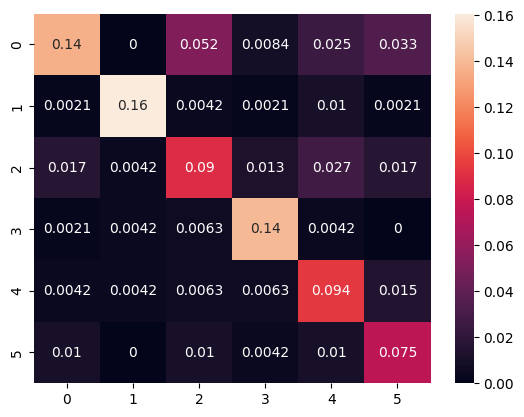

In [39]:
cm = confusion_matrix(np.argmax(pred,axis=1), y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True)

In [40]:
model.save('skin.h5')

### Transfer Learning

In [63]:
data_dir='Skin_Conditions'
img_width,img_height=32,32
train_datagen=ImageDataGenerator(rescale=1/255,validation_split=.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode='categorical', subset='training')

test_datagen=ImageDataGenerator(rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode='categorical', subset='validation')

base_model=VGG16(weights='imagenet', input_shape=(img_width,img_height,3),include_top=False) 

model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False  
    
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(6,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=10,validation_data=test_datagenerator)

Found 1920 images belonging to 6 classes.
Found 474 images belonging to 6 classes.
Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.4147 - loss: 1.5310 - val_accuracy: 0.6013 - val_loss: 1.1170
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.6381 - loss: 0.9919 - val_accuracy: 0.6519 - val_loss: 0.9586
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.6949 - loss: 0.8787 - val_accuracy: 0.6730 - val_loss: 0.9381
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7124 - loss: 0.8081 - val_accuracy: 0.6688 - val_loss: 0.8926
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7376 - loss: 0.7202 - val_accuracy: 0.7089 - val_loss: 0.8968
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.7664 - loss: 0.6550 - val_accuracy: 0.6751 - val_loss: 0.8667
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.7865 - loss: 0.6027 - val_accuracy: 0.6878 - val_loss: 0.8532
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━

In [64]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │           6,150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,309,076 (62.21 MB)

 Trainable params: 531,462 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,062,926 (4.05 MB)

In [65]:
test_loss, test_acc=model.evaluate(test_datagenerator, verbose=2)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

15/15 - 9s - 615ms/step - accuracy: 0.7110 - loss: 0.8034
Test Accuracy: 0.7109704613685608
Test Loss: 0.8034477829933167


In [72]:
model.save('skin.keras')

### Predict the Images

In [95]:
img=image.load_img('Skin_Conditions/Acne/Acne_25.jpg', target_size=(224,224))
img=image.img_to_array(img)
img=np.expand_dims(img, axis=0)

In [96]:
model=VGG16(weights='imagenet')

In [97]:
pred=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [98]:
decode_predictions(pred, top=1)

[[('n09229709', 'bubble', 0.10945973)]]

In [99]:
#Although our success rate was 70 percent, the transfer learning package could not correctly predict the images we gave it. 
#I think it was probably because it was related to health.

### Summary

In this study, a Convolutional Neural Network (CNN) model was developed for the automatic classification of skin diseases. The model was trained with a dataset consisting of images that recognize and classify skin diseases. During the training process, data augmentation techniques, optimization algorithms and hyperparameter adjustments were applied to increase the accuracy of the model. As a result, our model showed a success rate close to 70 percent. Our transfer learning success results are also 70 percent.